In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load the diabetes dataset
df = pd.read_csv('diabetes.csv')

In [3]:
# Display the first few rows of the dataset
df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Get basic statistical details
df.describe()


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [13]:
# Show the data shape after filling missing values
df.shape

(768, 9)

In [8]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


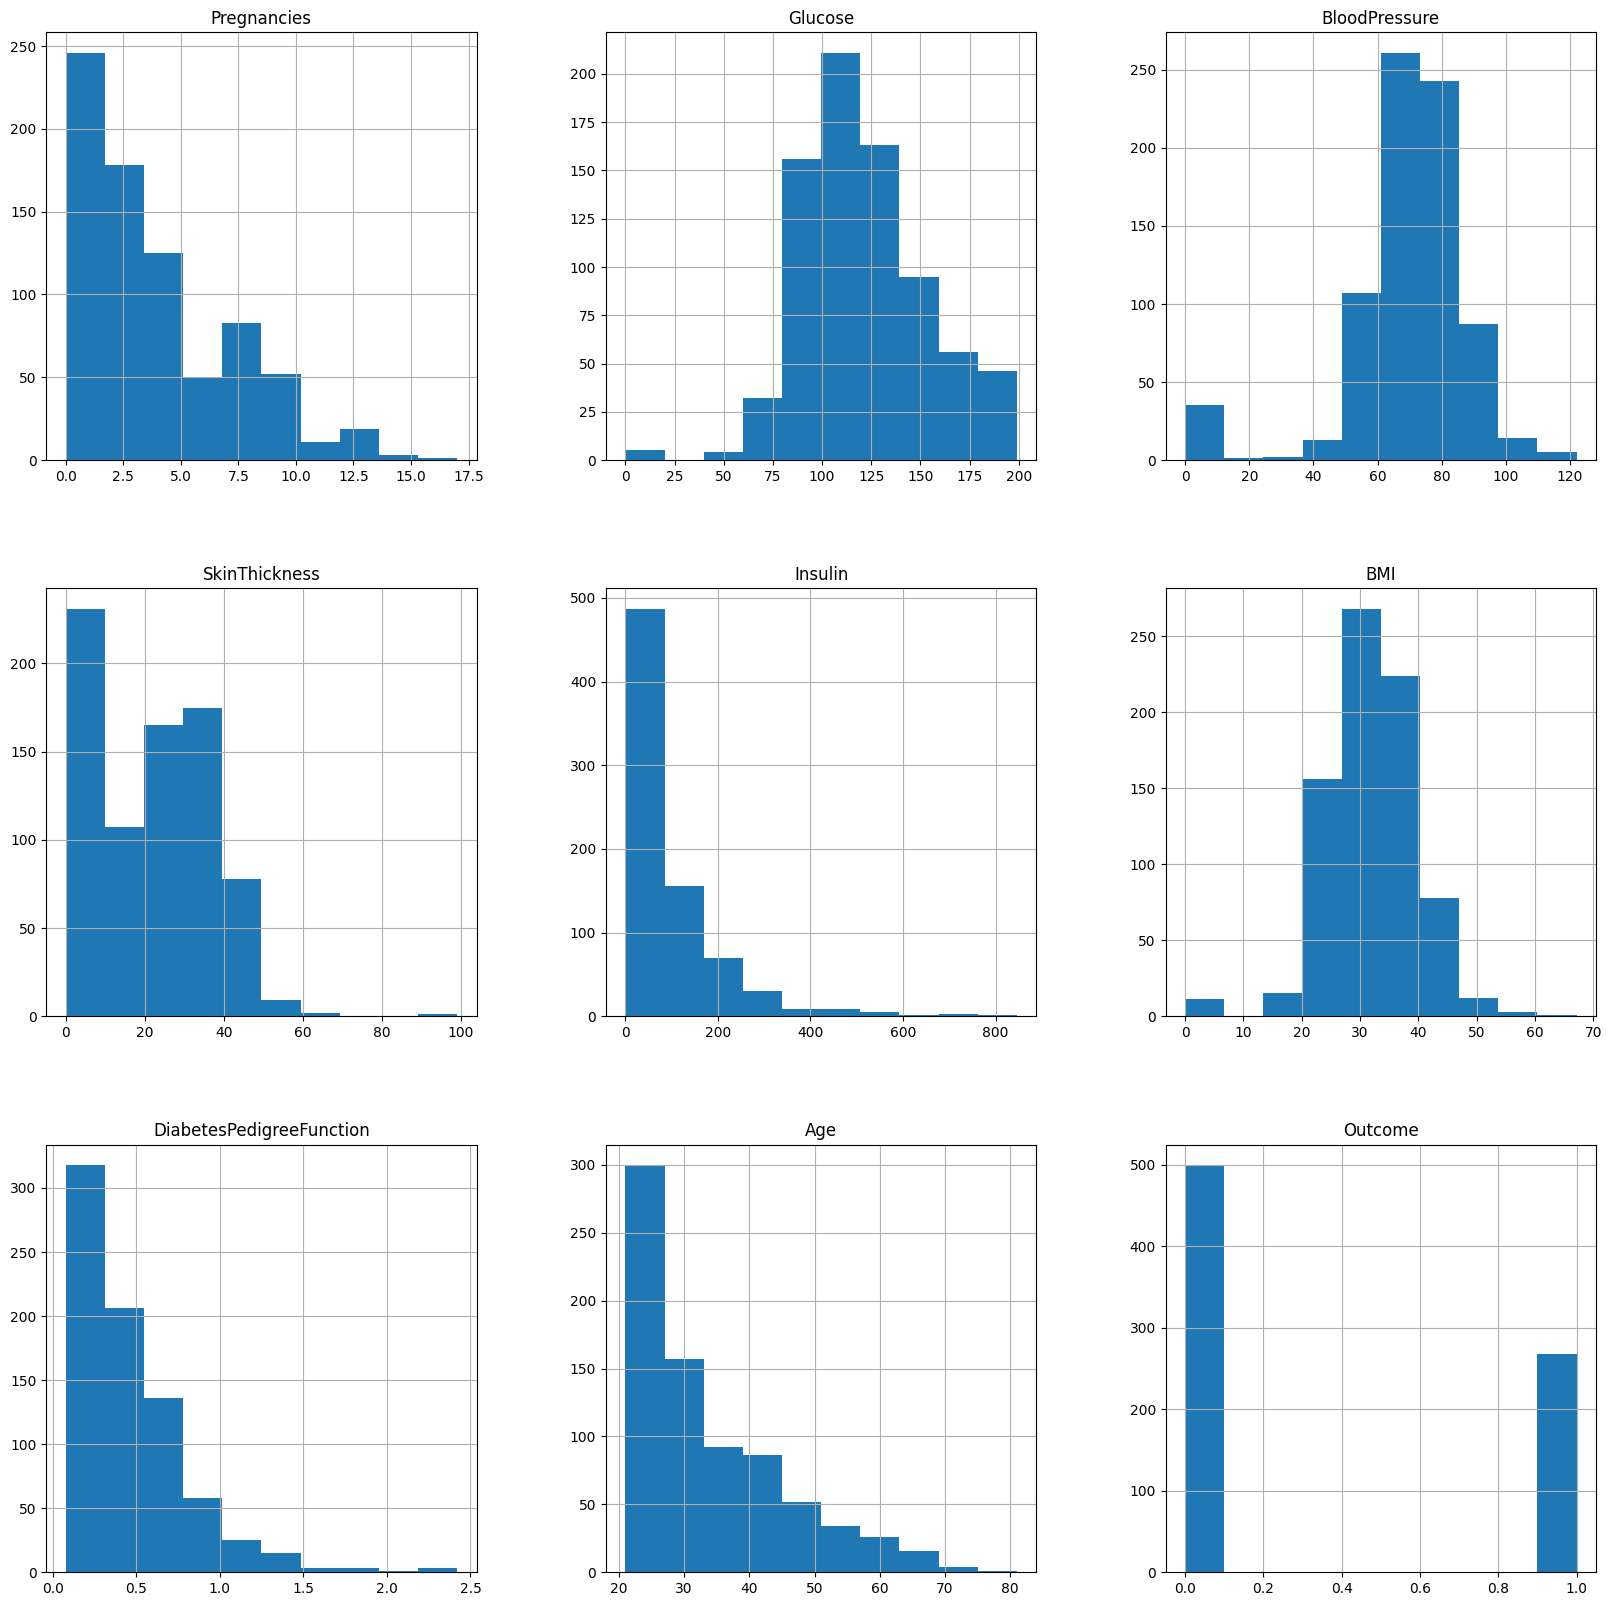

In [9]:
p = df.hist(figsize = (20,20))

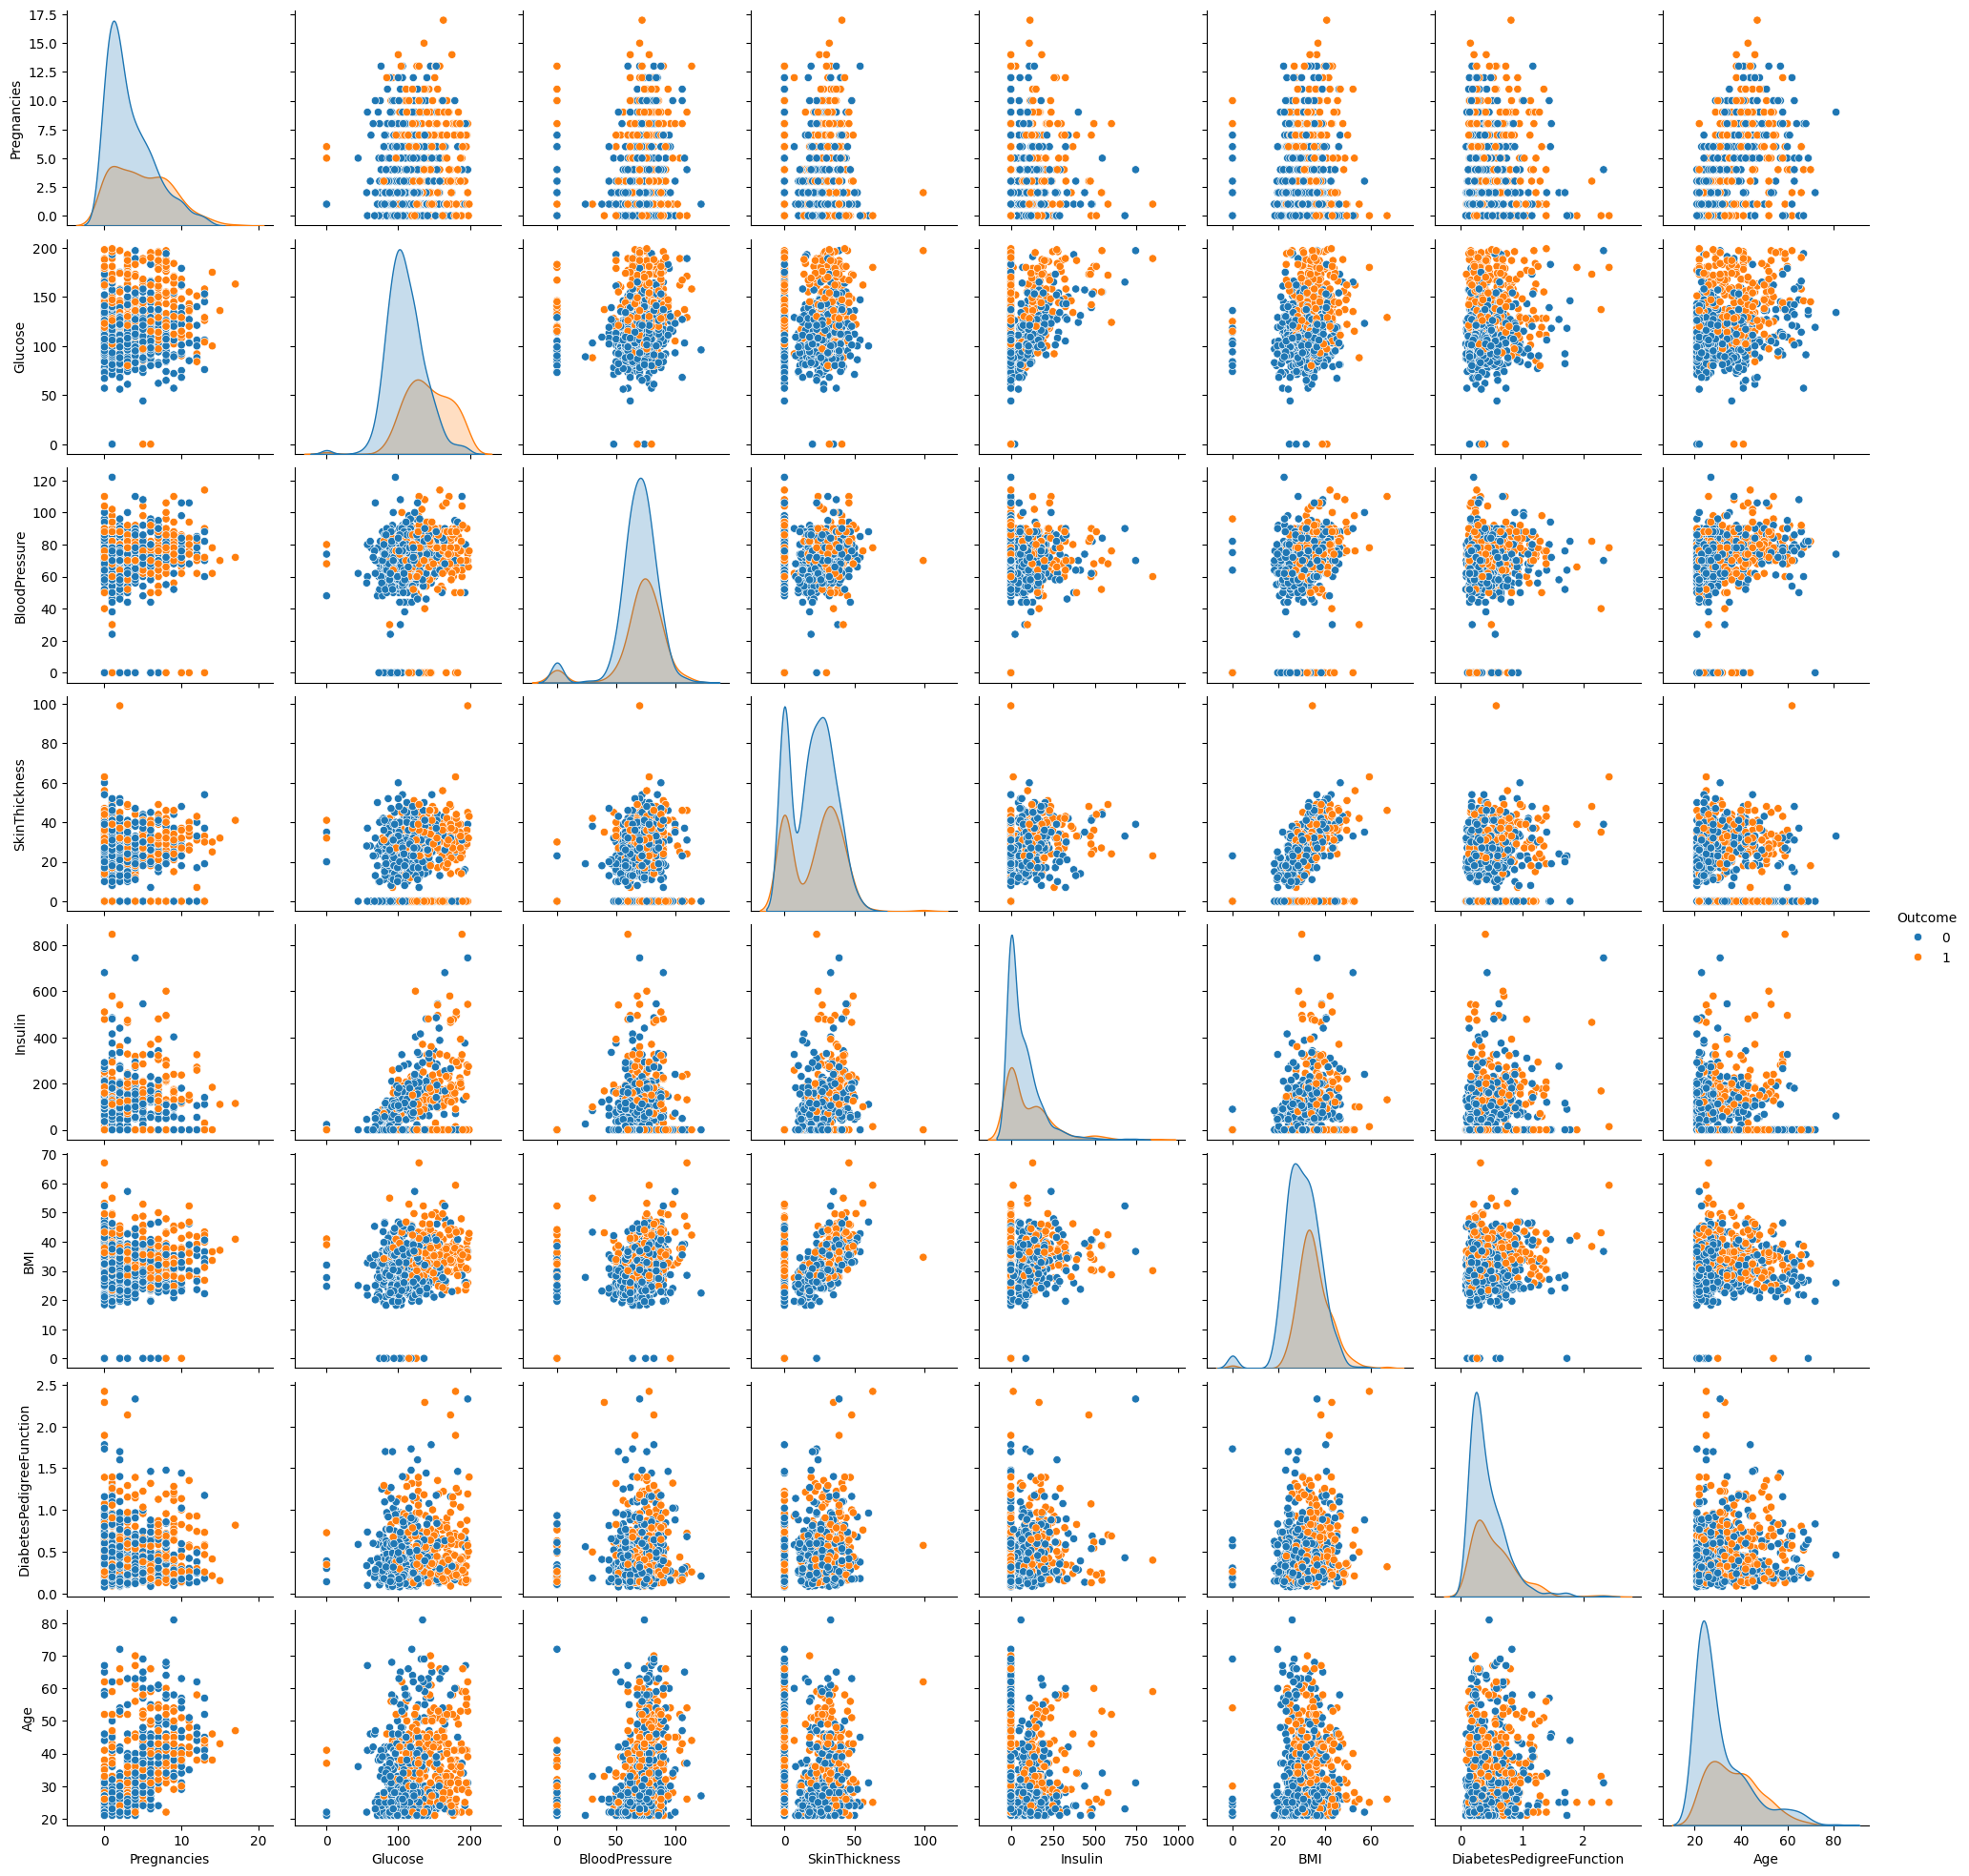

In [6]:
# Pairplot for visualizing relationships between variables
sns.pairplot(df, hue='Outcome')
plt.show()


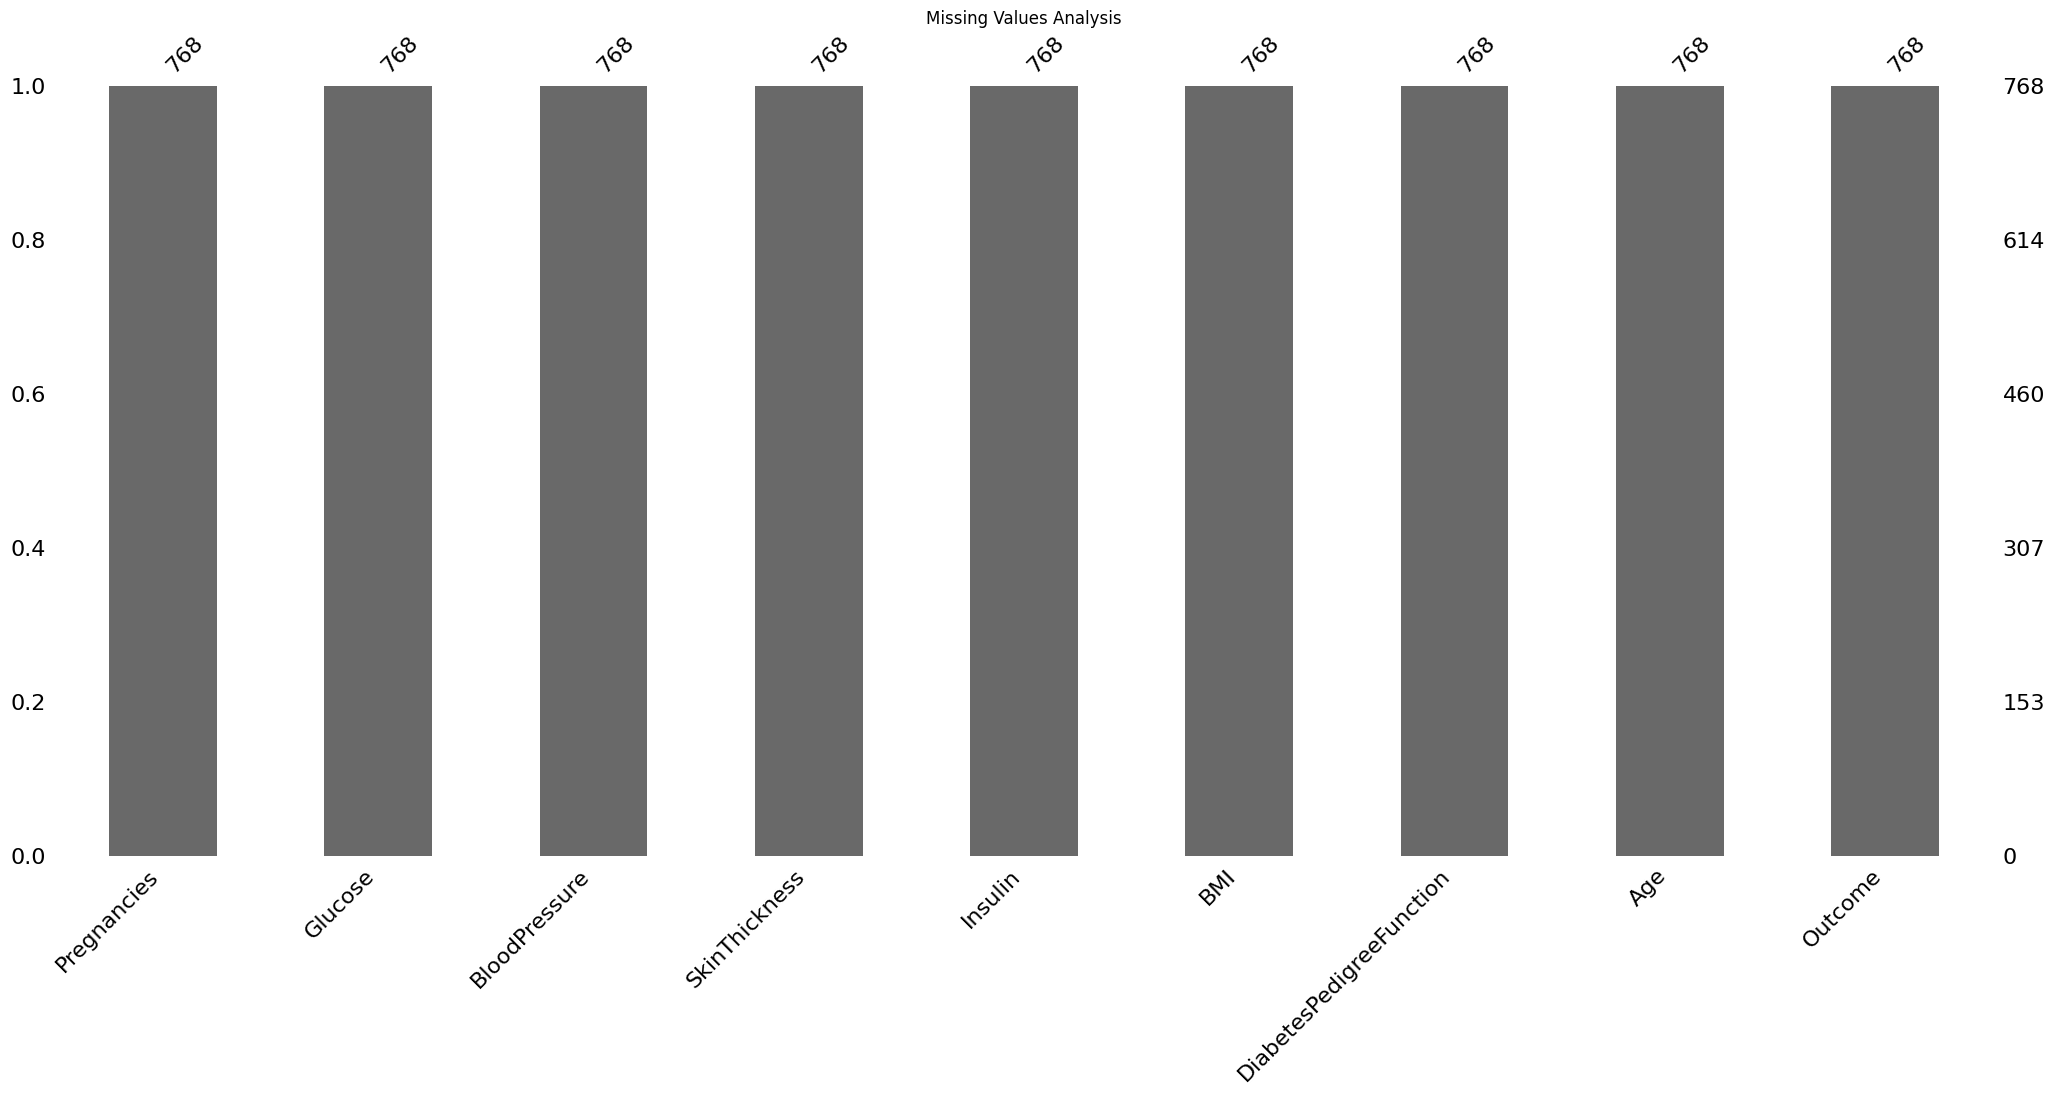

In [15]:
# Import missingno for visualizing missing values
import missingno as msno

# Plot missing values
msno.bar(df)
plt.title("Missing Values Analysis")
plt.show()


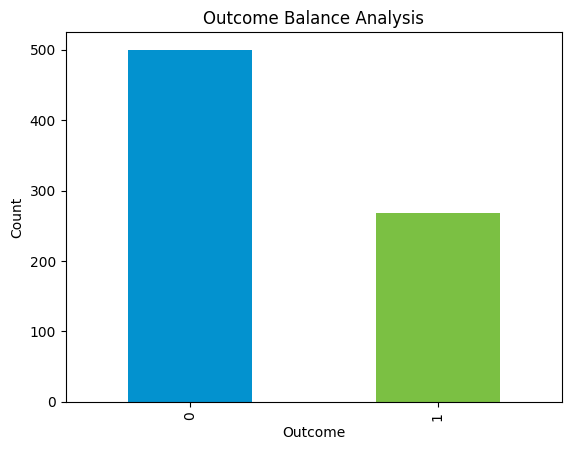

In [16]:
# Checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))

# Plot outcome balance
df.Outcome.value_counts().plot(kind="bar", color=[color_wheel[i] for i in sorted(color_wheel)])
plt.title("Outcome Balance Analysis")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()


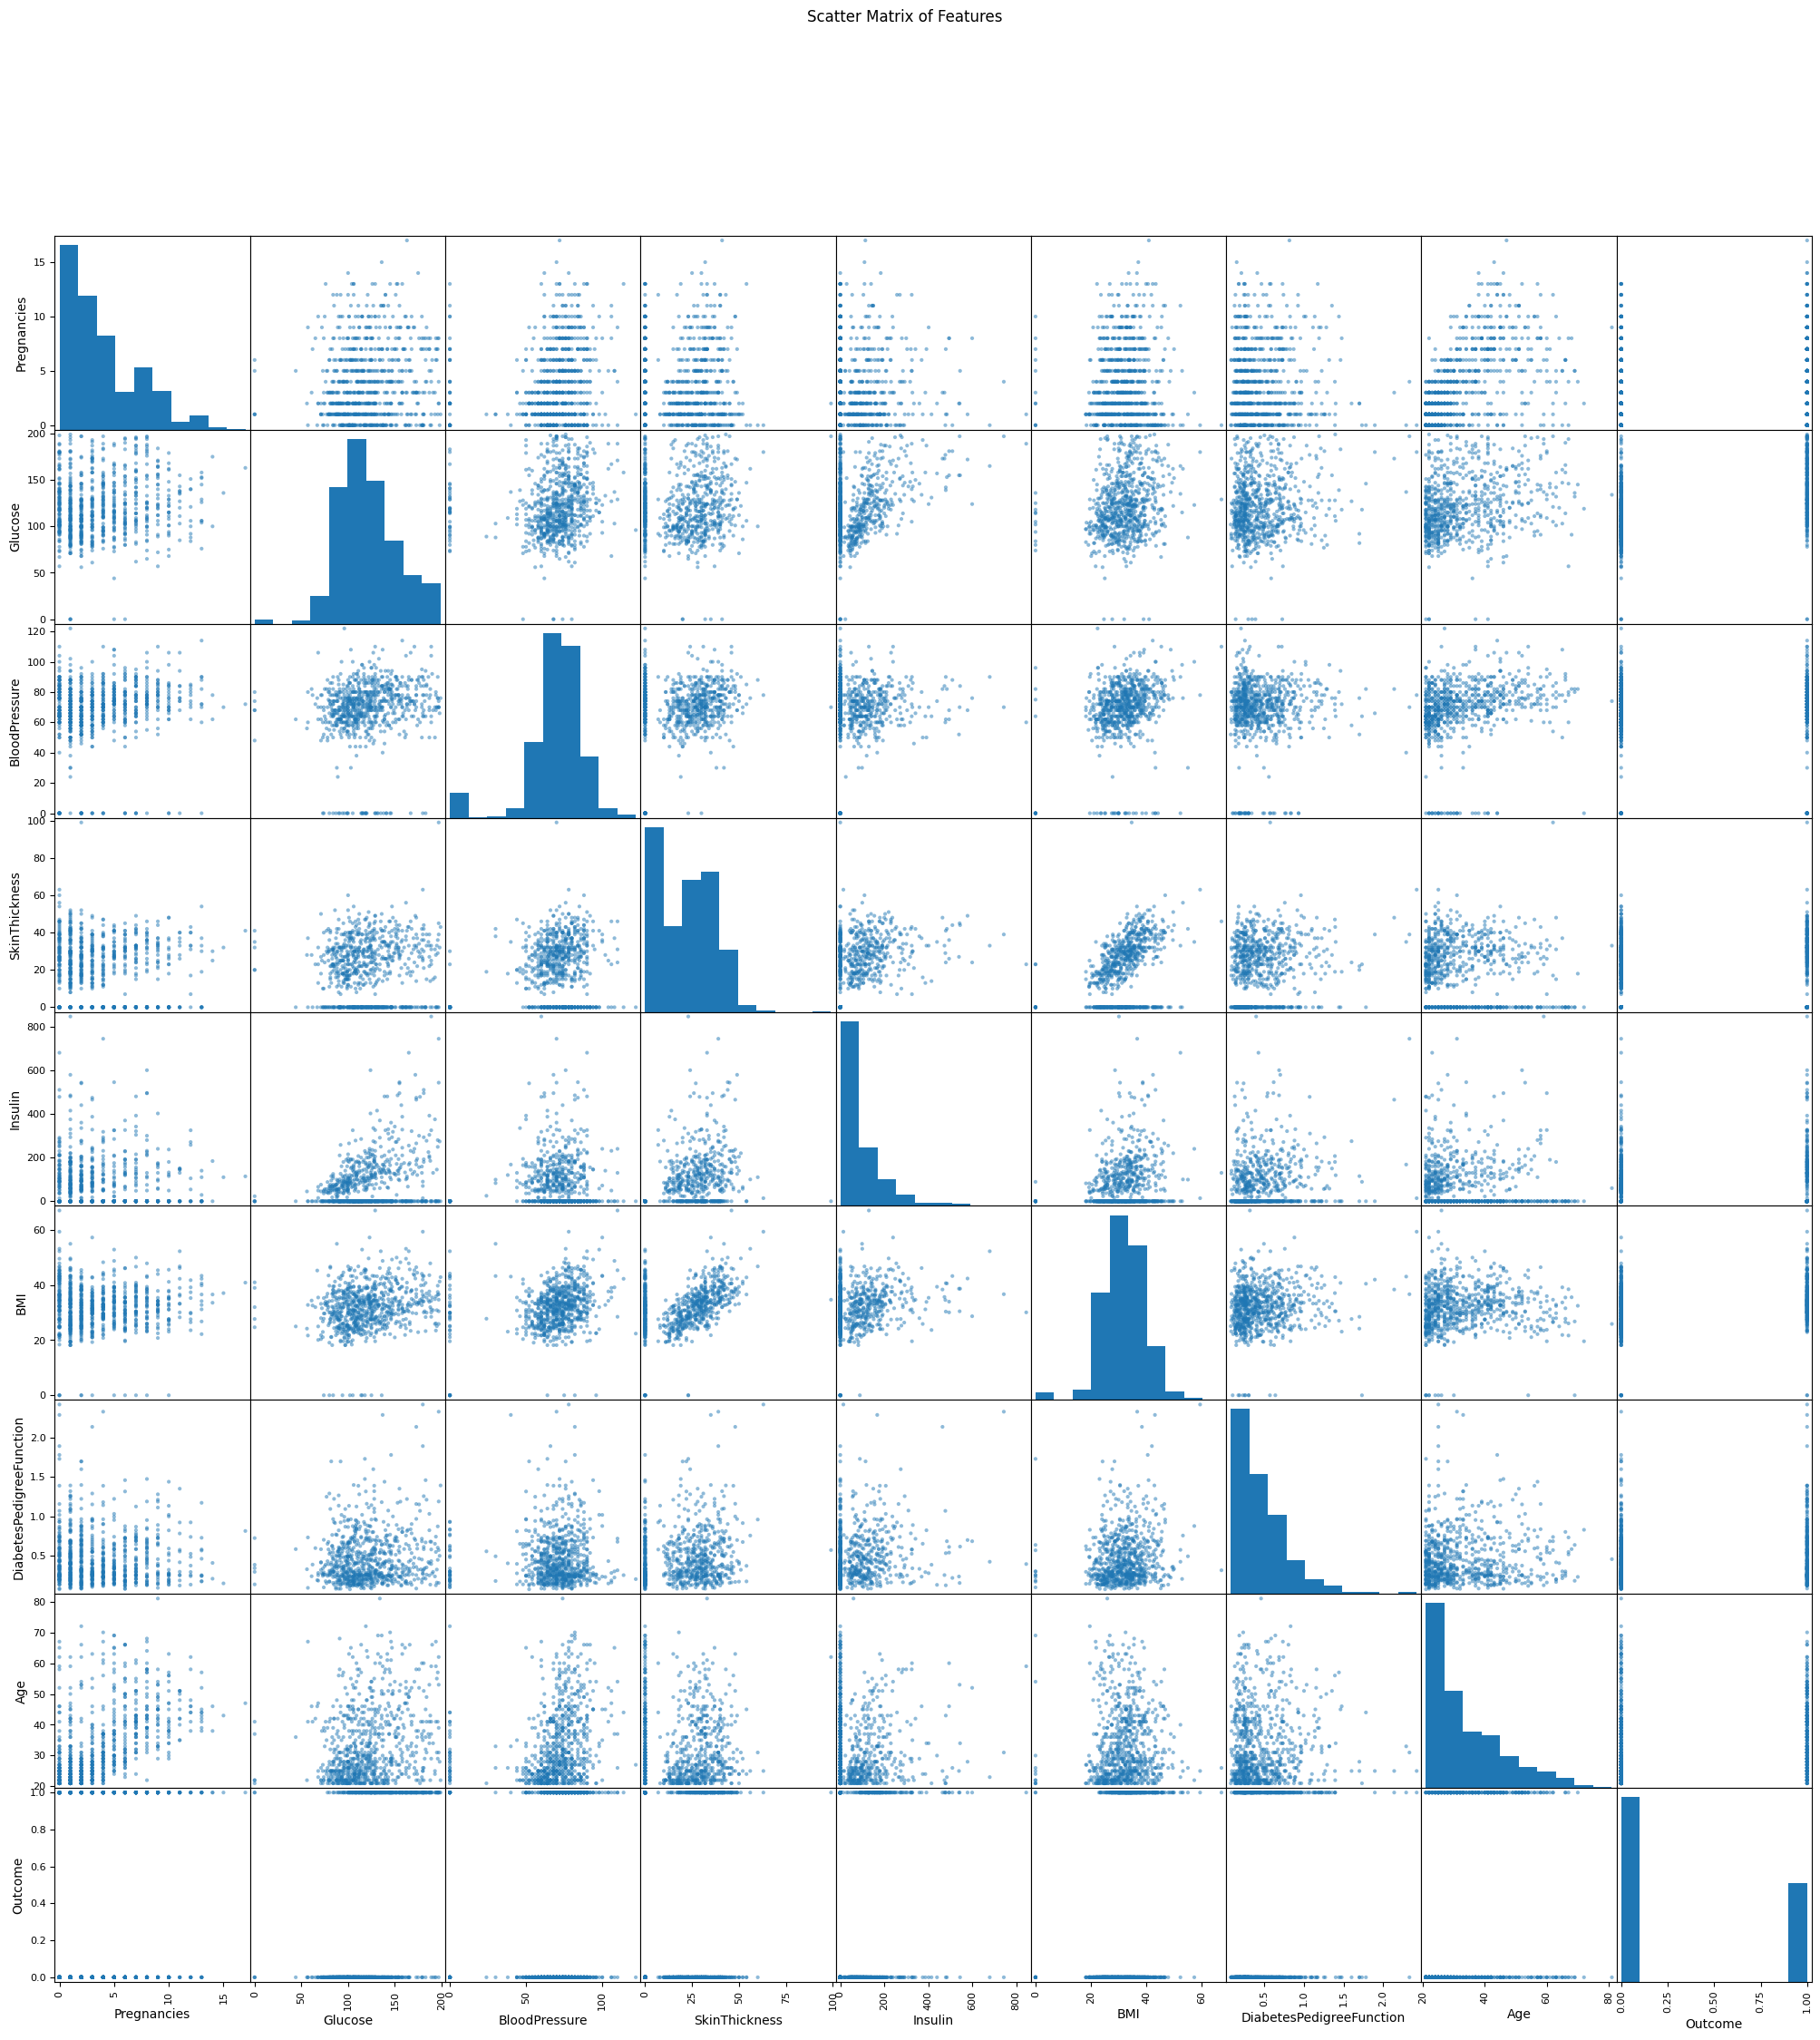

In [17]:
from pandas.plotting import scatter_matrix

# Visualize pairwise relationships between features
scatter_matrix(df, figsize=(25, 25))
plt.suptitle("Scatter Matrix of Features")
plt.show()


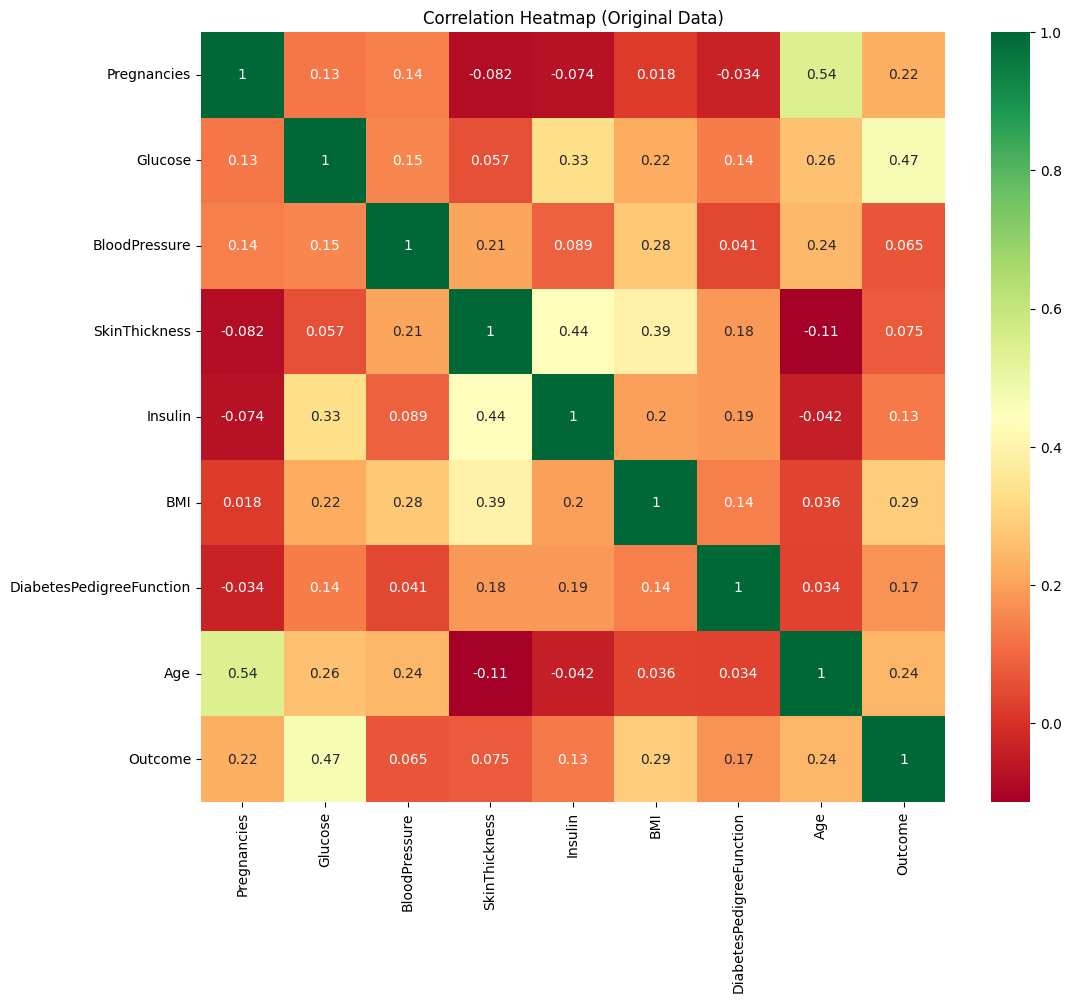

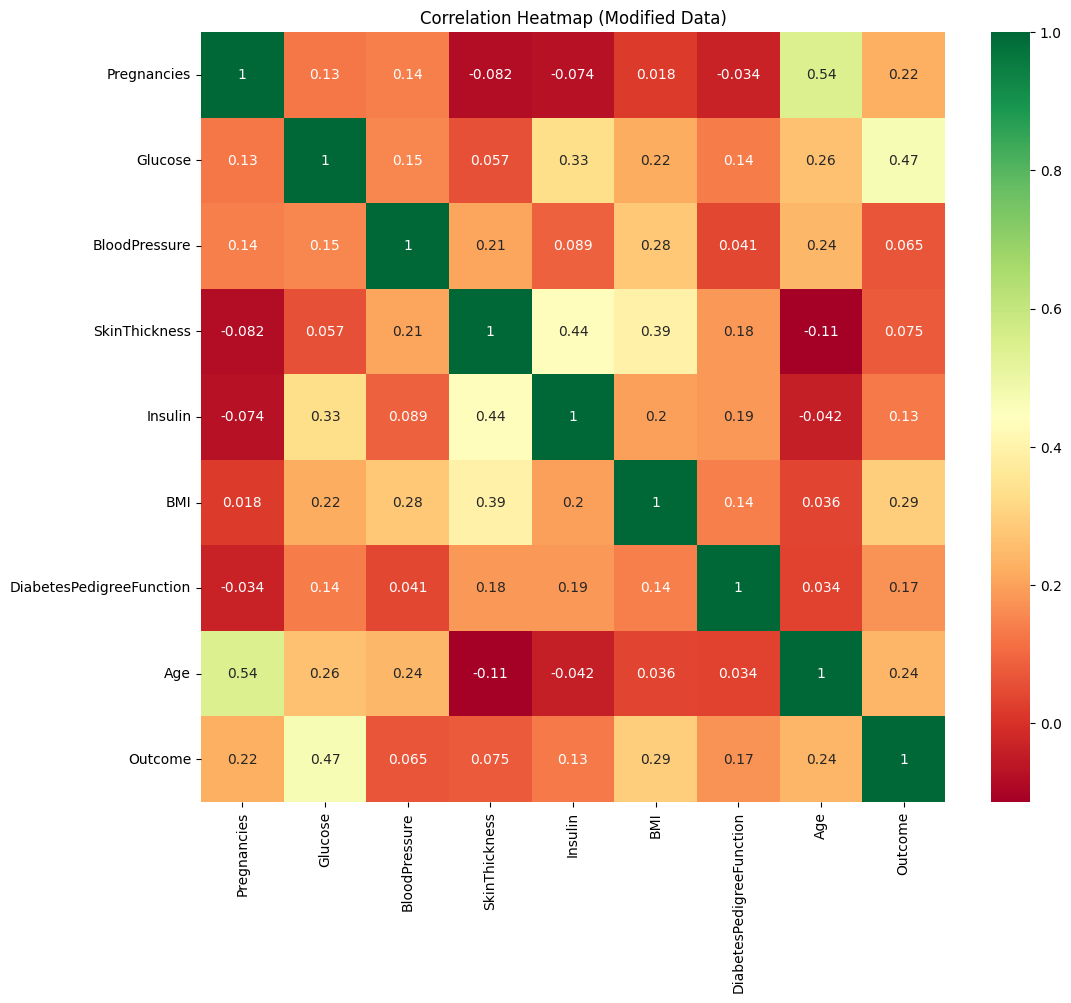

In [18]:
# Correlation heatmap of the original dataset
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.title("Correlation Heatmap (Original Data)")
plt.show()

# Correlation heatmap of the modified dataset
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.title("Correlation Heatmap (Modified Data)")
plt.show()


In [19]:
from sklearn.preprocessing import StandardScaler

# Standardizing features to have mean=0 and variance=1
sc_X = StandardScaler()
X = pd.DataFrame(
    sc_X.fit_transform(df.drop(["Outcome"], axis=1)),
    columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
             'BMI', 'DiabetesPedigreeFunction', 'Age']
)

# Show the first few rows of the standardized data
X.head()

# Separating the target variable
y = df.Outcome


In [20]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/3, random_state=42, stratify=y
)


In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize lists to hold training and testing scores
test_scores = []
train_scores = []

In [22]:
# Iterate over a range of k values to find the best one
for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)

    # Record training and testing scores
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [23]:
# Print the maximum train score and corresponding k value
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score * 100, list(map(lambda x: x + 1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [24]:
# Print the maximum test score and corresponding k value
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

Max test score 76.953125 % and k = [11]


Max train score 100.0 % and k = [1]
Max test score 76.953125 % and k = [11]


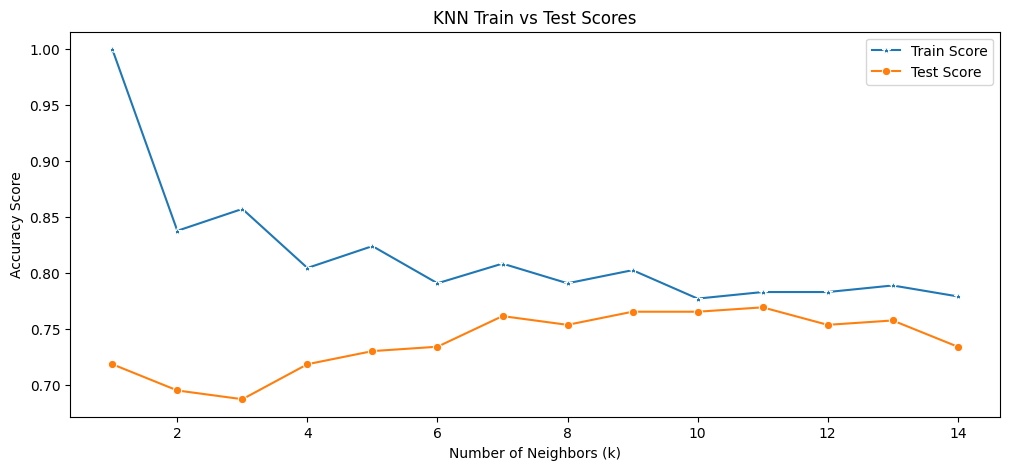

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import os

# Initialize lists to hold training and testing scores
test_scores = []
train_scores = []

# Iterate over a range of k values to find the best one
for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)

    # Record training and testing scores
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

# Print the maximum train score and corresponding k value
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score * 100, list(map(lambda x: x + 1, train_scores_ind))))

# Print the maximum test score and corresponding k value
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

# Plot the scores
plt.figure(figsize=(12, 5))
sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score')
plt.title("KNN Train vs Test Scores")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")

# Save the figure
output_path = os.path.join(os.getcwd(), "KNN_Train_vs_Test_Scores.png")
plt.savefig(output_path)
plt.show()


In [28]:
# Setup a knn classifier with the best k (from previous step, e.g., k=11)
knn = KNeighborsClassifier(11)

# Fit the model
knn.fit(X_train, y_train)

# Calculate accuracy score on the test set
knn_score = knn.score(X_test, y_test)
print("KNN Test Set Accuracy: {:.2f}%".format(knn_score * 100))


KNN Test Set Accuracy: 76.95%


c:\Users\KEYUR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


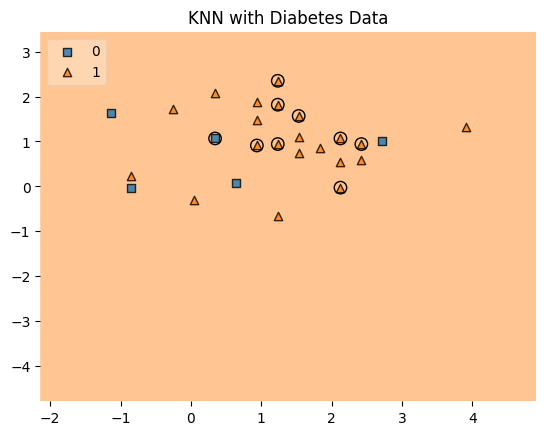

In [37]:
from mlxtend.plotting import plot_decision_regions
import os

# Define filler values for features that can't be plotted in 2D
value = 20000
width = 20000

# Plot decision regions using filler values for remaining features
plot_decision_regions(X.values, y.values, clf=knn, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
plt.title('KNN with Diabetes Data')

# Save the figure
output_path = os.path.join(os.getcwd(), "KNN_with_Diabetes_Data.png")
plt.savefig(output_path)
plt.show()


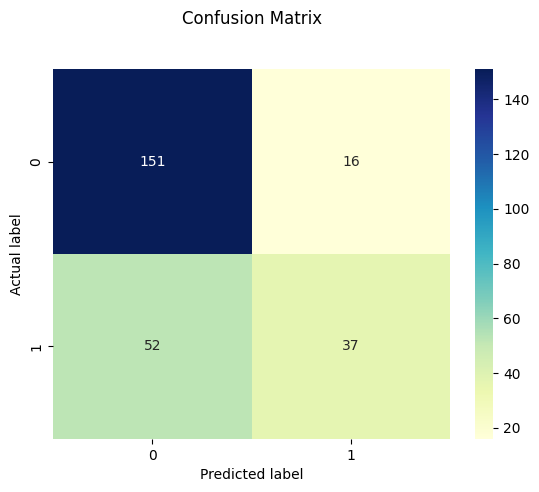

In [38]:
from sklearn.metrics import confusion_matrix
import os

# Get predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Save the figure
output_path = os.path.join(os.getcwd(), "Confusion_Matrix.png")
plt.savefig(output_path)
plt.show()


In [33]:
from sklearn.metrics import classification_report

# Print classification report for precision, recall, and F1-score
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.88      0.83       167
           1       0.71      0.56      0.63        89

    accuracy                           0.77       256
   macro avg       0.75      0.72      0.73       256
weighted avg       0.76      0.77      0.76       256



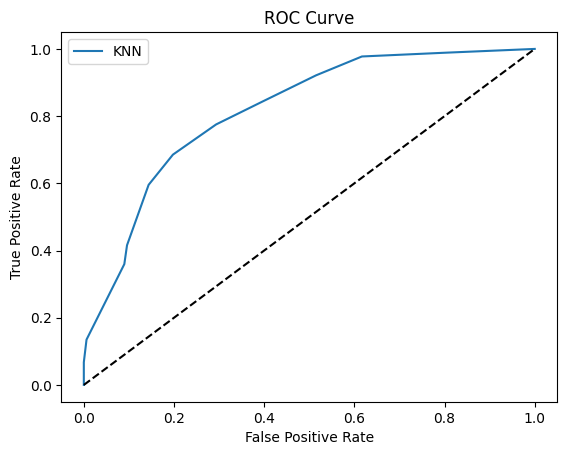

AUC: 0.82


In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
import os

# Calculate probabilities for ROC curve
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label='KNN')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

# Save the figure
output_path = os.path.join(os.getcwd(), "ROC_Curve.png")
plt.savefig(output_path)
plt.show()

# Calculate Area Under the ROC Curve (AUC)
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: {:.2f}".format(auc))


In [35]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 50)}

# Initialize GridSearchCV with KNN classifier and parameter grid
knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Fit GridSearchCV
knn_cv.fit(X, y)

# Output best score and parameters
print("Best Score: {:.2f}".format(knn_cv.best_score_))
print("Best Parameters: {}".format(knn_cv.best_params_))


Best Score: 0.77
Best Parameters: {'n_neighbors': 17}


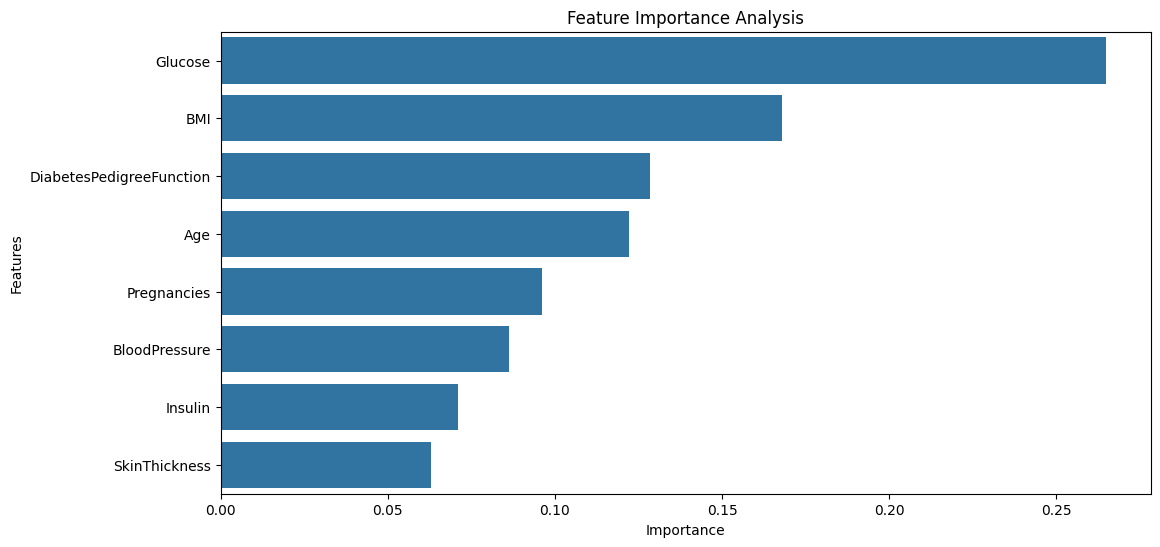

In [40]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Fit a RandomForestClassifier to the data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importance Analysis')
plt.xlabel('Importance')
plt.ylabel('Features')

# Save the figure
output_path = os.path.join(os.getcwd(), "Feature_Importance_Analysis.png")
plt.savefig(output_path)
plt.show()


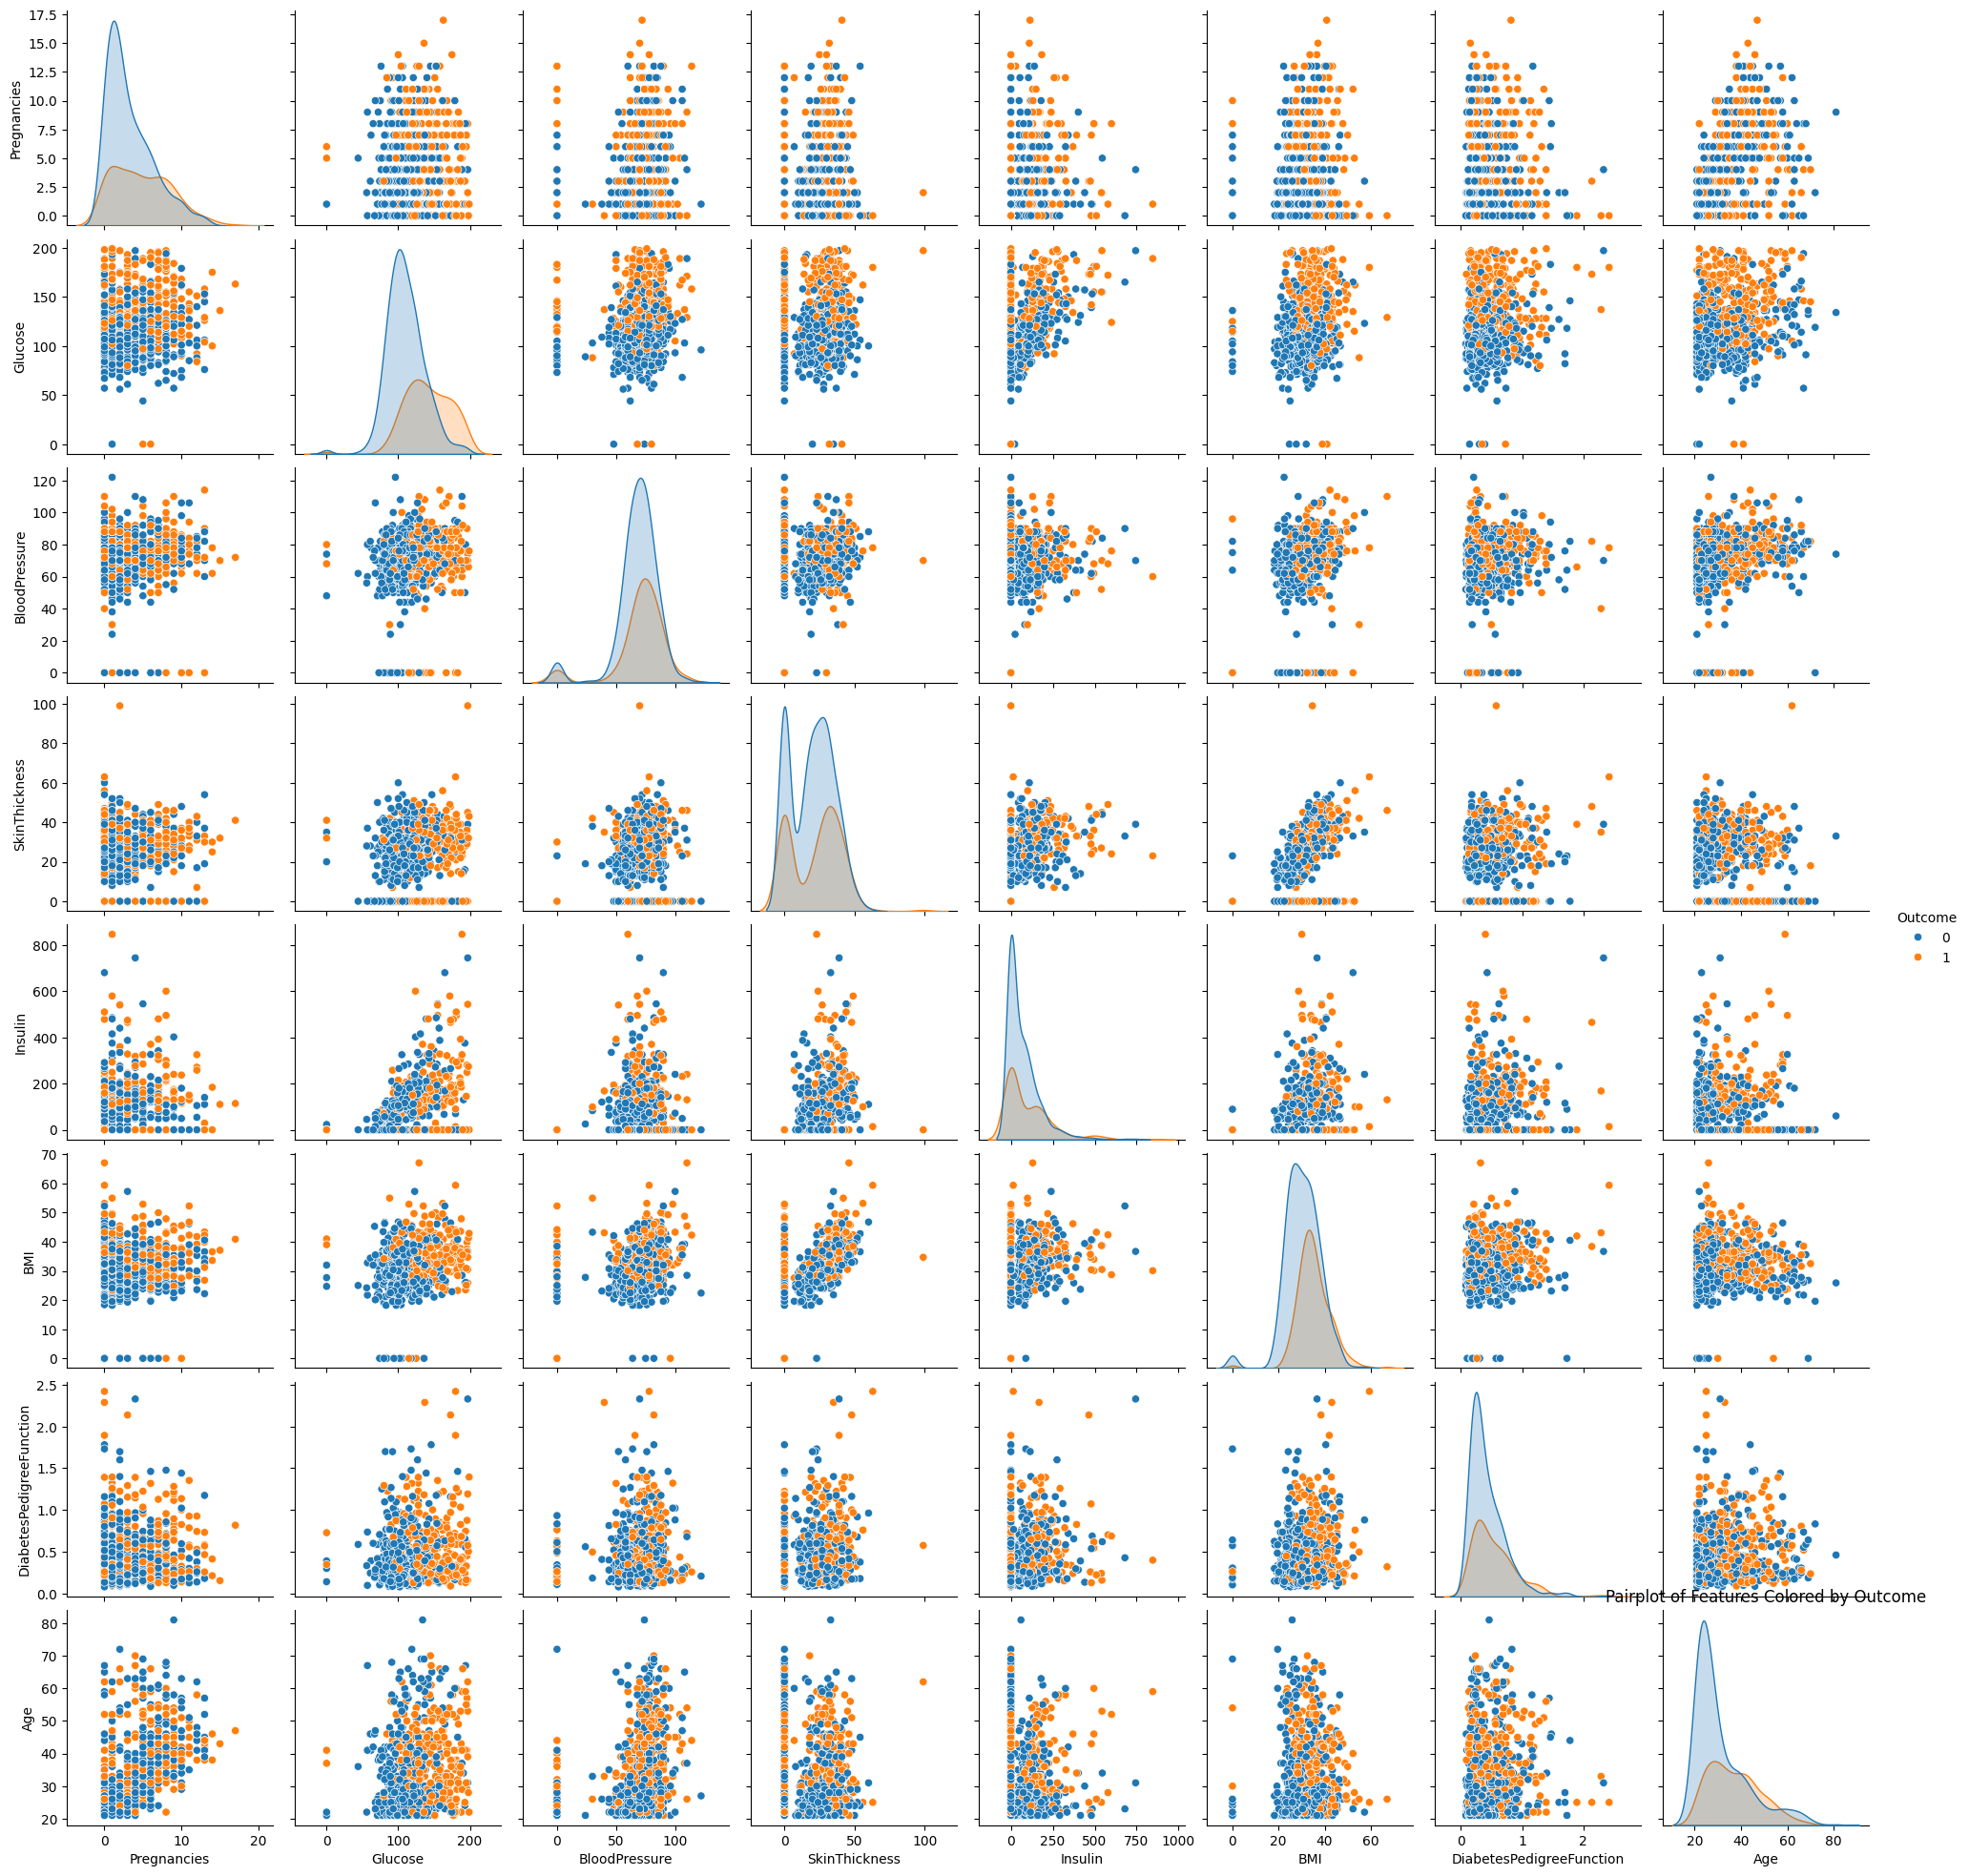

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load the diabetes dataset
df = pd.read_csv('diabetes.csv')

# Pairplot for visualizing relationships between variables
sns.pairplot(df, hue='Outcome')
plt.title('Pairplot of Features Colored by Outcome')

# Save the figure
output_path = os.path.join(os.getcwd(), "Pairplot_Features_Colored_Outcome.png")
plt.savefig(output_path)
plt.show()
